In [1]:
%%capture
!pip install fbprophet
!pip install prophet
!pip install pystan==2.19.1.1 prophet
!pip install --upgrade plotly

In [2]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 40.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 41.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 130.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 59.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
from pmdarima.arima import auto_arima
py.init_notebook_mode()
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
from prophet import Prophet
from prophet.plot import plot_plotly

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [5]:
data_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_a.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [6]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [7]:
data_test_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2017-01-28 01:42:00 to 2017-01-28 02:41:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpu     60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [8]:
data_train_a.reset_index(inplace=True)

In [9]:
data_train_a.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [10]:
m = Prophet()
m.fit(data_train_a)

01:07:51 - cmdstanpy - INFO - Chain [1] start processing
01:07:51 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=1)
future.tail()

ds
416 2017-01-28 01:38:00
417 2017-01-28 01:39:00
418 2017-01-28 01:40:00
419 2017-01-28 01:41:00
420 2017-01-29 01:41:00

In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
416 2017-01-28 01:38:00   2.034758    1.484939    2.541615
417 2017-01-28 01:39:00   2.043367    1.537077    2.600452
418 2017-01-28 01:40:00   2.051975    1.545988    2.555548
419 2017-01-28 01:41:00   2.060584    1.531397    2.597880
420 2017-01-29 01:41:00  14.456898    9.679531   19.375732

01:07:56 - cmdstanpy - INFO - Chain [1] start processing
01:07:56 - cmdstanpy - INFO - Chain [1] done processing


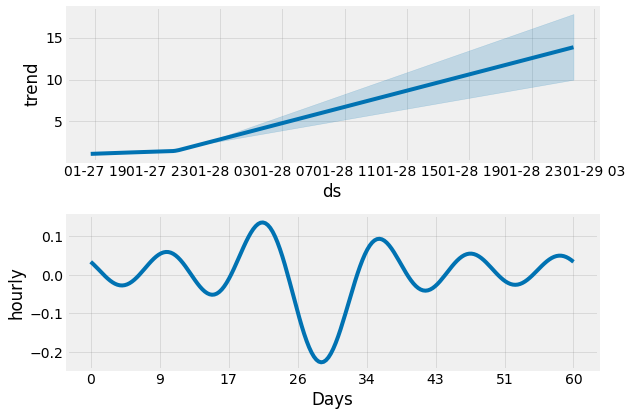

In [13]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_a).predict(future)
fig = m.plot_components(forecast)

01:08:01 - cmdstanpy - INFO - Chain [1] start processing
01:08:01 - cmdstanpy - INFO - Chain [1] done processing


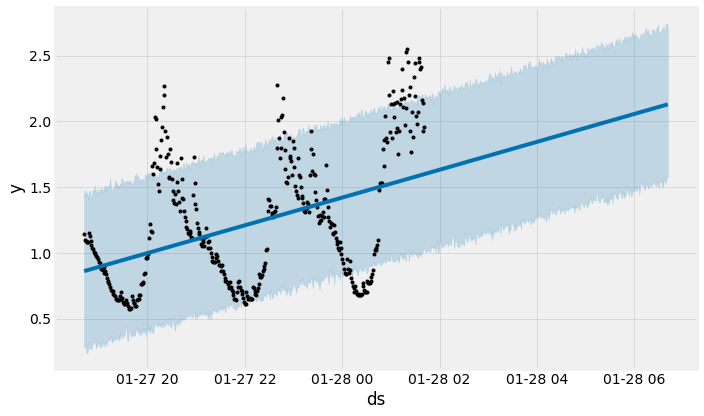

In [14]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [15]:
m=Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
m.fit(data_train_a)

01:08:03 - cmdstanpy - INFO - Chain [1] start processing
01:08:03 - cmdstanpy - INFO - Chain [1] done processing


01:08:03 - cmdstanpy - INFO - Chain [1] start processing
01:08:03 - cmdstanpy - INFO - Chain [1] done processing


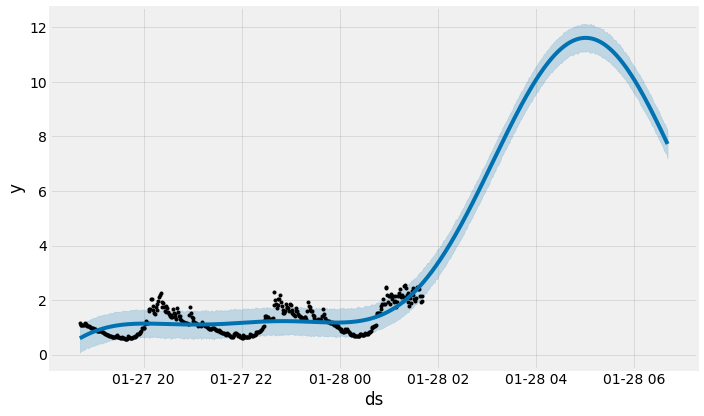

In [16]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_a)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

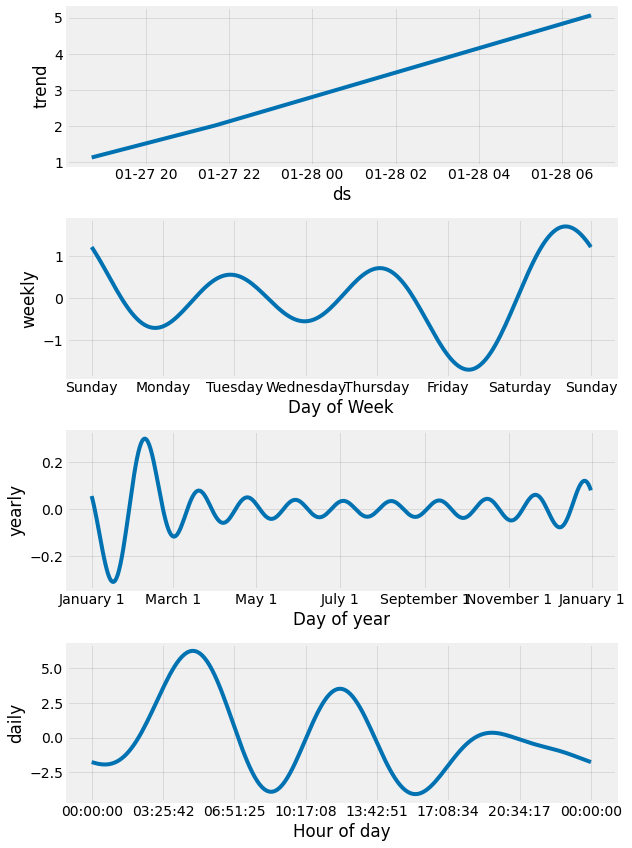

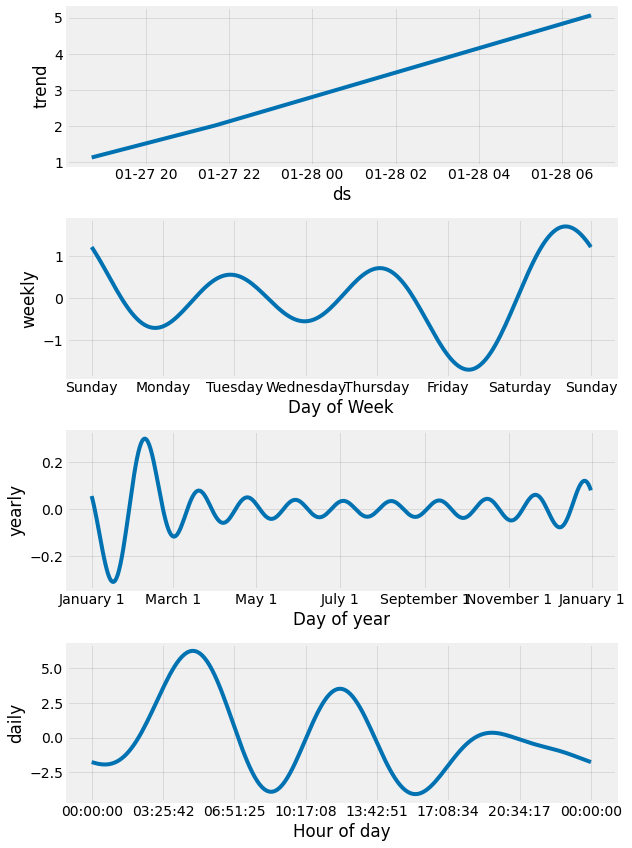

In [17]:
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
m.plot_components(fcst)

In [18]:
data_train_a.index = pd.to_datetime(data_train_a.index)
data_train_b.index = pd.to_datetime(data_train_b.index)

In [19]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
stepwise_model.fit(data_train_a)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

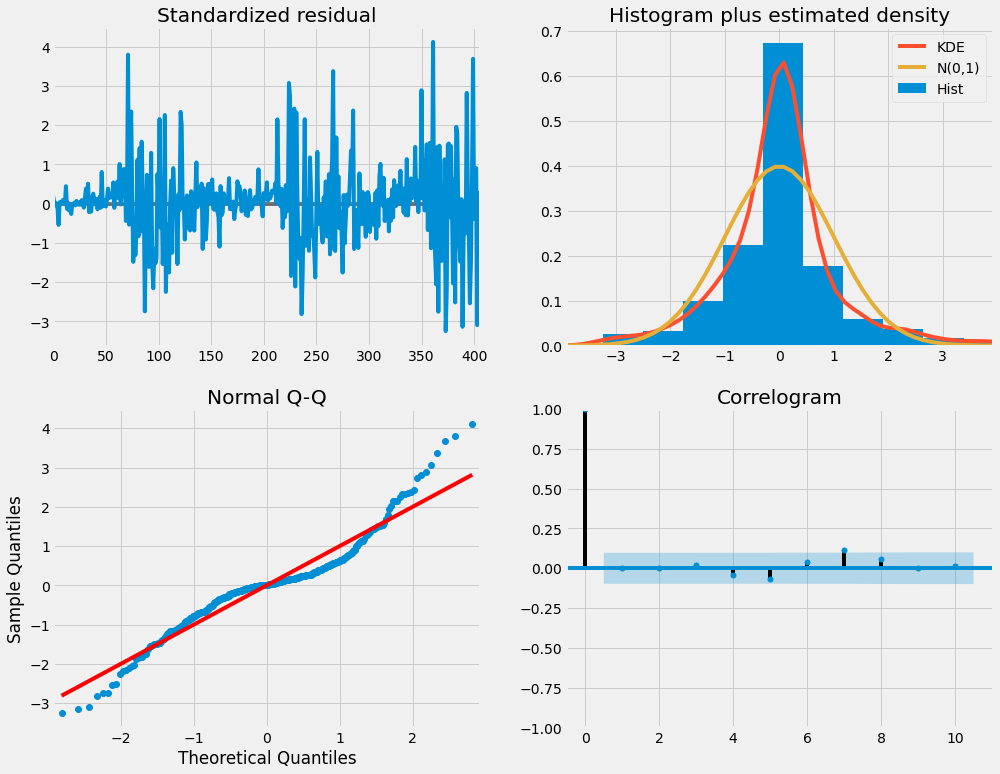

In [ ]:
stepwise_model.fit(data_train_a).plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
future_forecast = stepwise_model.predict(n_periods=60)

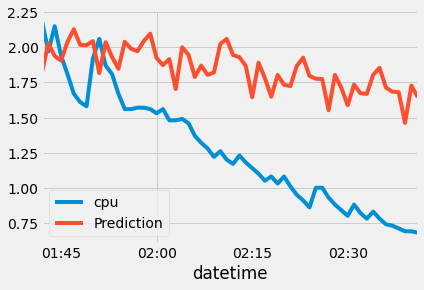

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_a.index,columns=['Prediction'])
pd.concat([data_test_a,future_forecast],axis=1).plot()

In [ ]:
data_train_b.reset_index(inplace=True)

In [ ]:
data_train_b.rename(columns={'datetime': 'ds', 'cpu': 'y'}, inplace=True)

In [ ]:
m = Prophet()
m.fit(data_train_b)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/lsu4gms4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/r5ceu69t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56119', 'data', 'file=/tmp/tmps6qyfva6/lsu4gms4.json', 'init=/tmp/tmps6qyfva6/r5ceu69t.json', 'output', 'file=/tmp/tmp13fg1y0p/prophet_model-20220812223020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:30:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing
IN

In [ ]:
future = m.make_future_dataframe(periods=1)
future.tail()

ds
596 2017-01-28 04:38:00
597 2017-01-28 04:39:00
598 2017-01-28 04:40:00
599 2017-01-28 04:41:00
600 2017-01-29 04:41:00

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/pqirxz_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/wi22qnk4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68483', 'data', 'file=/tmp/tmps6qyfva6/pqirxz_h.json', 'init=/tmp/tmps6qyfva6/wi22qnk4.json', 'output', 'file=/tmp/tmp4l7_jth2/prophet_model-20220812223028.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:30:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:30:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


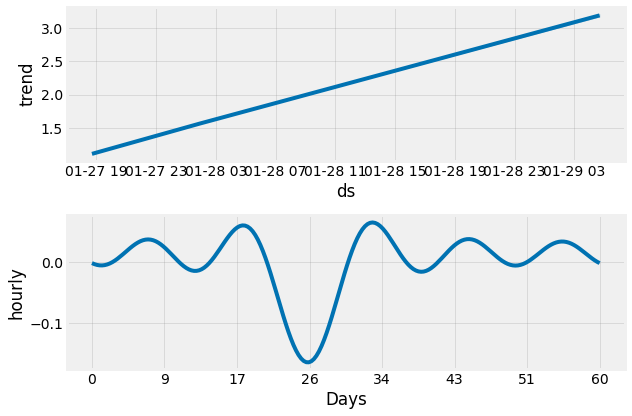

In [ ]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='hourly', period=60, fourier_order=5)
forecast = m.fit(data_train_b).predict(future)
fig = m.plot_components(forecast)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/czg8ysxh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/u7yoigw6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67196', 'data', 'file=/tmp/tmps6qyfva6/czg8ysxh.json', 'init=/tmp/tmps6qyfva6/u7yoigw6.json', 'output', 'file=/tmp/tmpfqnz07mi/prophet_model-20220812223106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:31:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:31:06 - cmdstanpy - INFO - Chain [1] done processing
IN

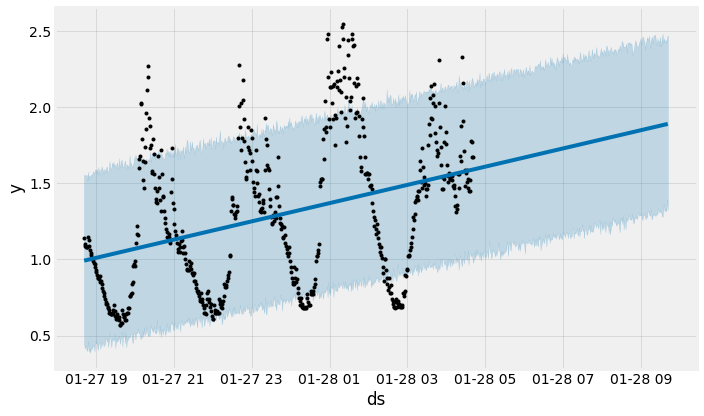

In [ ]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_train_b)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/pr548txk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmps6qyfva6/amvc2g37.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30482', 'data', 'file=/tmp/tmps6qyfva6/pr548txk.json', 'init=/tmp/tmps6qyfva6/amvc2g37.json', 'output', 'file=/tmp/tmpe_92e_ku/prophet_model-20220812223138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:31:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:31:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


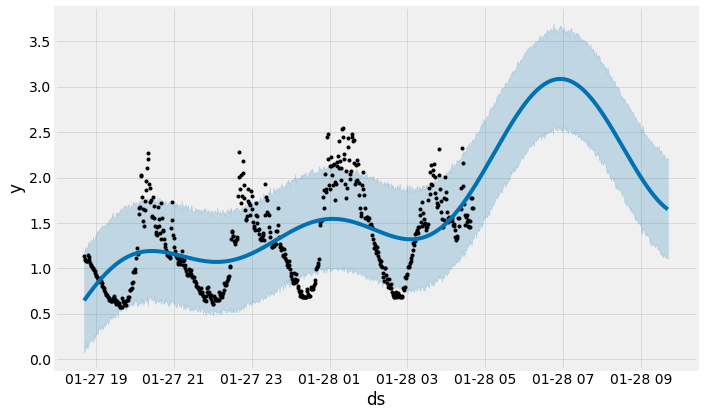

In [ ]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True).fit(data_train_b)
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
fig = m.plot(fcst)

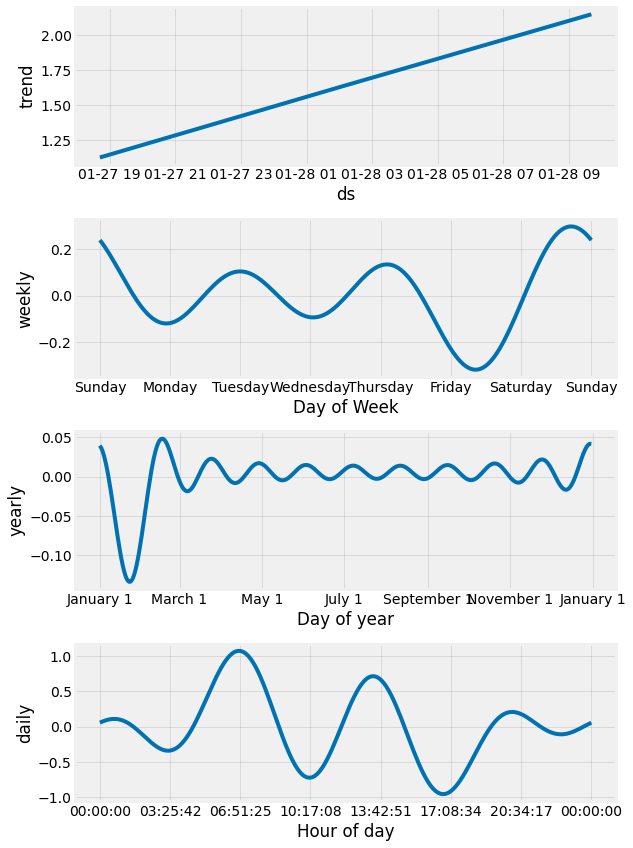

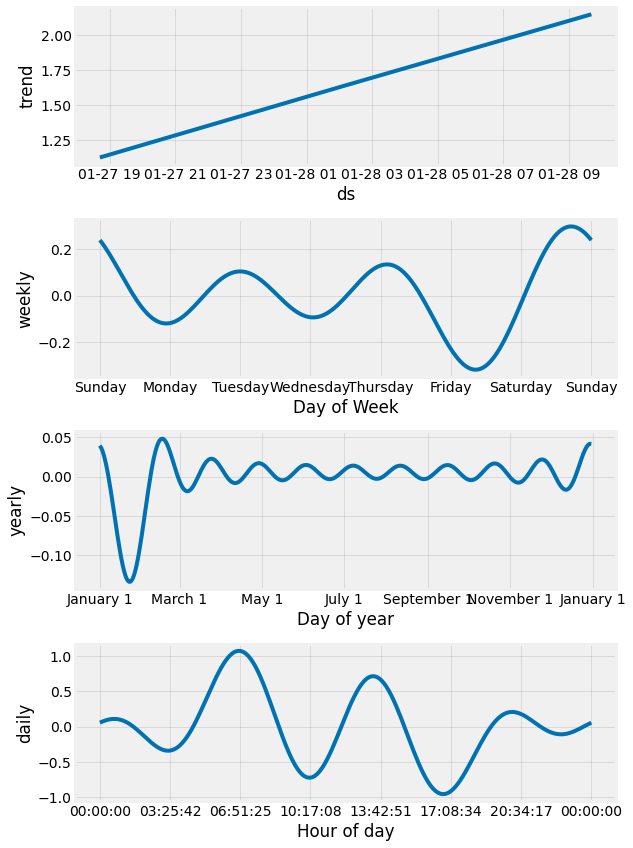

In [ ]:
future = m.make_future_dataframe(periods=300, freq='1min')
fcst = m.predict(future)
m.plot_components(fcst)

In [ ]:
data_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', parse_dates=[0], infer_datetime_format=True,index_col=0)
data_train_b.head()

cpu
datetime                 
2017-01-27 18:42:00  1.14
2017-01-27 18:43:00  1.10
2017-01-27 18:44:00  1.09
2017-01-27 18:45:00  1.08
2017-01-27 18:46:00  1.08

In [ ]:
stepwise_model = auto_arima(data_train_a, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-273.302, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-368.085, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.96 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-271.465, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-417.827, Time=1.01 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.75 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-419.762, Time=1.00 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-369.850, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.16 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.30 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-417.860, Time=1.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-421.259, Time=2.70 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-373.3

In [ ]:
stepwise_model.fit(data_train_b)

ARIMA(order=(3, 1, 2), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

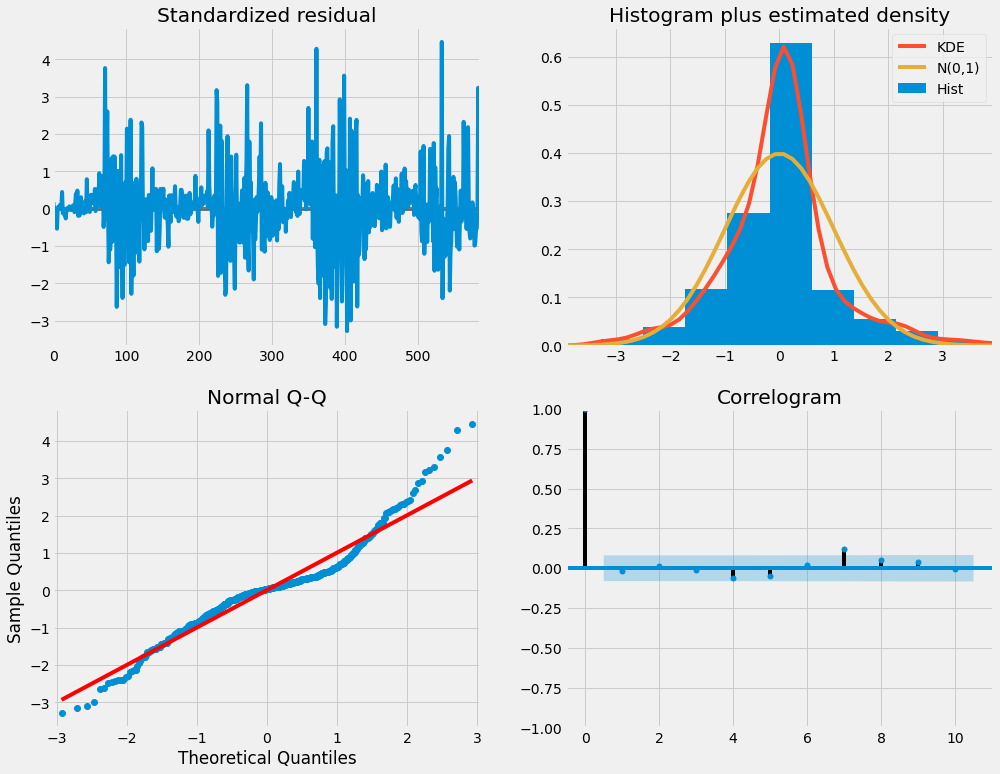

In [ ]:
stepwise_model.fit(data_train_b).plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
future_forecast = stepwise_model.predict(n_periods=60)

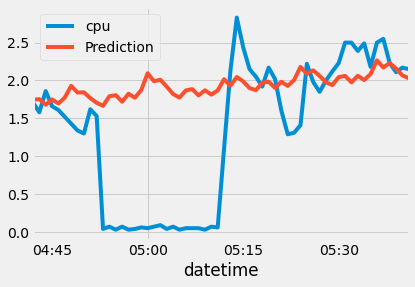

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = data_test_b.index,columns=['Prediction'])
pd.concat([data_test_b,future_forecast],axis=1).plot()